# STRESS CLASSIFICATION

In [22]:
#importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

Reading train and test dataset

In [23]:
train = pd.read_csv("C:\BIA\Capstone Project\dreaddit-train.csv")
test = pd.read_csv("C:\BIA\Capstone Project\dreaddit-test.csv")

# Label

1 = stress

0 = no stress

In [3]:
train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [24]:
#We merged the two files.

df = pd.concat([train,test],axis=0,ignore_index=True)

In [25]:
#after merged how many rows and columns are there

df.shape

(3553, 116)

 # Exploratory Data Analysis

In [26]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [7]:
#checking columns

df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.1+ MB


In [9]:
df[['subreddit','label']].value_counts()

subreddit         label
anxiety           1        416
ptsd              1        414
relationships     0        387
                  1        307
ptsd              0        297
domesticviolence  1        249
anxiety           0        234
assistance        0        229
survivorsofabuse  0        172
                  1        143
homeless          0        139
domesticviolence  0        139
assistance        1        126
homeless          1         81
almosthomeless    1         59
stress            1         45
almosthomeless    0         40
stress            0         33
food_pantry       0         26
                  1         17
dtype: int64

In [10]:
#checking null values

df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [11]:
#checking unique values in text column

df["text"].unique()

array(['He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.',
       "Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if 

In [27]:
#import textblob for processing textual data

from textblob import TextBlob

In [28]:
#We find the positive or negative of the words.

TextBlob("the best").polarity 

1.0

In [14]:
# we are checking postive, negative sentiment and subjetivity
#polarity score -1.0 (most negative) to 1.0 (most positive), with 0 indicating a neutral sentiment.
#The subjectivity score ranges from 0.0 (most objective) to 1.0 (most subjective)

TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [29]:
#defining a function to detect sentiments

def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [37]:
df1["sentiment"]=df1["text"].apply(detect_sentiment)

C:\Users\Sumeet\AppData\Local\Temp\ipykernel_12096\1853394389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sentiment"]=df1["text"].apply(detect_sentiment)


In [35]:
df1.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [38]:
#checking value counts in sentiment

df1.sentiment.value_counts()

 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64

In [33]:
#storing new data into df1

df1=df[["text","label"]]

In [39]:
df1.head()

,text,label,sentiment
0,"He said he had not felt that way before, sugge...",1,-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0,0.292857
2,My mom then hit me with the newspaper and it s...,1,0.011894
3,"until i met my new boyfriend, he is amazing, h...",1,0.141671
4,October is Domestic Violence Awareness Month a...,1,-0.204167


In [40]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [41]:
stopwords = set(stopwords.words("english"))

In [42]:
#definig a function to clean 

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df1["text"] = df1["text"].apply(clean)

C:\Users\Sumeet\AppData\Local\Temp\ipykernel_12096\3462199589.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["text"] = df1["text"].apply(clean)


In [46]:
#After cleaning text column

df1["text"]

0       said felt way sugget go rest trigger ahead you...
1       hey rassist sure right place post goe  im curr...
2       mom hit newspap shock would know dont like pla...
3       met new boyfriend amaz kind sweet good student...
4       octob domest violenc awar month domest violenc...
                              ...                        
3548    horribl vivid nightmar everi night sometim the...
3549    also cant think without get angri jealous talk...
3550    furthermor told got realli serious anxieti dep...
3551    here link amazon wish list two item  link does...
3552    keep us protect alreadi told unwelcom person l...
Name: text, Length: 3530, dtype: object

In [47]:
#checking duplicates

duplicates=df1.duplicated().sum()
print(duplicates)

0


In [48]:
df1=df1.drop_duplicates('text')

In [49]:
from collections import Counter

In [50]:
# Applying loop in text column

count=Counter()
for text in df1['text'].values:
    for word in text.split():
        count[word] +=1

In [51]:
#finding the most common words used

cw=count.most_common(10)

In [52]:
cw

[('im', 1710),
 ('like', 1585),
 ('feel', 1451),
 ('get', 1448),
 ('know', 1174),
 ('time', 1169),
 ('go', 1167),
 ('want', 1038),
 ('would', 933),
 ('dont', 925)]

In [53]:
#making data frame of common words

cw= pd.DataFrame(count.most_common(15))
cw.columns = ['word','count']
cw.head()

,word,count
0,im,1710
1,like,1585
2,feel,1451
3,get,1448
4,know,1174


In [ ]:
#plotting horizontal bar plot on most of common words

cw.plot(kind='barh',x='word',y='count', color="green")
plt.show()

In [54]:
#Dropping sentiment column

df1.drop('sentiment', axis=1, inplace=True)

In [55]:
df1.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1


<AxesSubplot:xlabel='label', ylabel='count'>

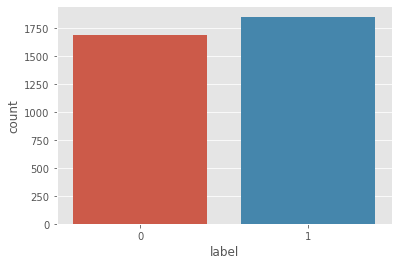

In [56]:
#Count plot of stress=1 and no stress=0 

sns.countplot(x=df1.label)

 # DATA MODELLING

In [57]:
#defining x and y

y=df1['label']
x=df1['text']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# BAG OF WORDS

In [59]:
vect= CountVectorizer()

In [60]:
x=vect.fit_transform(df1["text"])

In [61]:
df1.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1


# NAIVE BAYES

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.3)

In [63]:
nb=MultinomialNB()

In [64]:
nb.fit(x_train,y_train)

MultinomialNB()

In [65]:
y_pred=nb.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71       500
           1       0.72      0.86      0.79       559

    accuracy                           0.75      1059
   macro avg       0.76      0.75      0.75      1059
weighted avg       0.76      0.75      0.75      1059



In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test,y_pred)

array([[315, 185],
       [ 78, 481]], dtype=int64)

In [69]:
(315+481)/1059

0.7516525023607177

# Tfid

In [70]:
vect= TfidfVectorizer()
X=vect.fit_transform(df1['text'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 43)

In [71]:
df1.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1


# SUPPORT VECTOR CLASSIFIER

In [72]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [73]:
model4tfidf=LinearSVC()
model4tfidf.fit(x_train,y_train)
model4tfidf_predict=model4tfidf.predict(x_test)
model4tfidf_acc= accuracy_score(model4tfidf_predict, y_test)
print(model4tfidf_acc*100)

68.55524079320114


In [74]:
#Hyperparameter tuning

param_grid = { 'C':[1, 10, 100],
              
              'loss':['hinge', 'squared_hinge']} 
grid= GridSearchCV(model4tfidf, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................C=1, loss=hinge;, score=0.695 total time=   0.0s
[CV 2/5] END ...................C=1, loss=hinge;, score=0.715 total time=   0.1s
[CV 3/5] END ...................C=1, loss=hinge;, score=0.694 total time=   0.0s
[CV 4/5] END ...................C=1, loss=hinge;, score=0.713 total time=   0.0s
[CV 5/5] END ...................C=1, loss=hinge;, score=0.698 total time=   0.0s
[CV 1/5] END ...........C=1, loss=squared_hinge;, score=0.687 total time=   0.0s
[CV 2/5] END ...........C=1, loss=squared_hinge;, score=0.717 total time=   0.0s
[CV 3/5] END ...........C=1, loss=squared_hinge;, score=0.702 total time=   0.0s
[CV 4/5] END ...........C=1, loss=squared_hinge;, score=0.713 total time=   0.0s
[CV 5/5] END ...........C=1, loss=squared_hinge;, score=0.709 total time=   0.0s
[CV 1/5] END ..................C=10, loss=hinge;, score=0.695 total time=   0.1s
[CV 2/5] END ..................C=10, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1, 10, 100], 'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("best CV score: {:2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

In [75]:
model4tfidf=LinearSVC(C=1, loss='hinge')
model4tfidf.fit(x_train,y_train)
model4tfidf_predict=model4tfidf.predict(x_test)
model4tfidf_acc= accuracy_score(model4tfidf_predict, y_test)
print(model4tfidf_acc*100)

67.51652502360717


# LOGISTIC REGRESSION

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
vect= TfidfVectorizer()
x=vect.fit_transform(df1['text'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 43)

In [78]:
model1bow=LogisticRegression()
model1bow.fit(x_train,y_train)
model1bow_predict=model1bow.predict(x_test)
model1bow_acc= accuracy_score(model1bow_predict, y_test)
print(model1bow_acc*100)

75.2596789423985


# RANDOM FOREST CLASSIFIER

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model2w2v=RandomForestClassifier()

In [81]:
model2w2v.fit(x_train,y_train)
model2w2v_predict=model2w2v.predict(x_test)
model2w2v_acc= accuracy_score(model2w2v_predict, y_test)
print(model2w2v_acc*100)

70.82152974504248


In [ ]:
#file converted to csv for dashboard

cw.to_csv('cw.csv', index=False)

In [ ]:
s.to_csv('s.csv', index=False)

In [ ]:
df1.label.to_csv('df1.label.csv', index=False)

In [ ]:
#test random sentences 

In [ ]:
user="i a feeling good"
df1=vect.transform([user]).toarray()
output=model1bow.predict(df1)
print(output)